<a href="https://colab.research.google.com/github/JulienGremillot/OpenClassrooms_Ingenieur_Machine_Learning/blob/main/Classez%20des%20images%20%C3%A0%20l'aide%20d'algorithmes%20de%20Deep%20Learning/Classez_des_images_%C3%A0_l'aide_d'algorithmes_de_Deep_Learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory

# Comme mon modèle est basé sur EfficientNet, j'utilise cette méthode
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
drive.mount("/content/gdrive", force_remount=False)
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
print("Répertoire de travail courant : %s" % os.getcwd())

Mounted at /content/gdrive
Répertoire de travail courant : /content/gdrive/MyDrive/Colab Notebooks


In [ ]:
efficientnet_opt_120 = tf.keras.models.load_model('efficientnet_opt_120.h5')

In [ ]:
dataset_dir = "./images/"
width, height = 224, 224

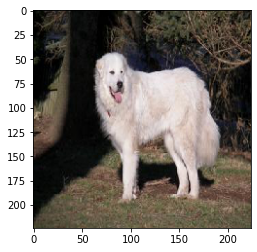

In [ ]:
img_path = os.path.join(dataset_dir, 'n02111500-Great_Pyrenees',
                        'n02111500_9306.jpg')
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [ ]:
train_ds = image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=99,
  image_size=(height, width),
  batch_size=32)
class_names = train_ds.class_names

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [ ]:
def get_top3(img):
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)  # batch d'une seule image
  img_preprocessed = preprocess_input(img_batch)  # normalisation

  prediction = efficientnet_opt_120.predict(img_preprocessed)
  # print(prediction.shape)  # vecteur des probabilités par classe

  top_indices = prediction[0].argsort()[-3:][::-1]
  # print(top_indices)
  result = [class_names[i] for i in top_indices]
  result.sort(key=lambda x: x[2], reverse=True)

  return(result)

Maltese_dog -> ['n02098286-West_Highland_white_terrier', 'n02085936-Maltese_dog', 'n02094114-Norfolk_terrier']
Afghan_hound -> ['n02088094-Afghan_hound', 'n02102318-cocker_spaniel', 'n02100877-Irish_setter']
Irish_wolfhound -> ['n02090721-Irish_wolfhound', 'n02097209-standard_schnauzer', 'n02098105-soft-coated_wheaten_terrier']
Bernese_mountain_dog -> ['n02107683-Bernese_mountain_dog', 'n02107574-Greater_Swiss_Mountain_dog', 'n02108000-EntleBucher']
Pomeranian -> ['n02112018-Pomeranian', 'n02112350-keeshond', 'n02112137-chow']
basenji -> ['n02110806-basenji', 'n02087046-toy_terrier', 'n02107312-miniature_pinscher']
Shih_Tzu -> ['n02086240-Shih_Tzu', 'n02098413-Lhasa', 'n02097474-Tibetan_terrier']
Tibetan_terrier -> ['n02097474-Tibetan_terrier', 'n02098413-Lhasa', 'n02105251-briard']
Leonberg -> ['n02111129-Leonberg', 'n02108551-Tibetan_mastiff', 'n02111277-Newfoundland']
Great_Pyrenees -> ['n02111500-Great_Pyrenees', 'n02099712-Labrador_retriever', 'n02110958-pug']
Samoyed -> ['n021118

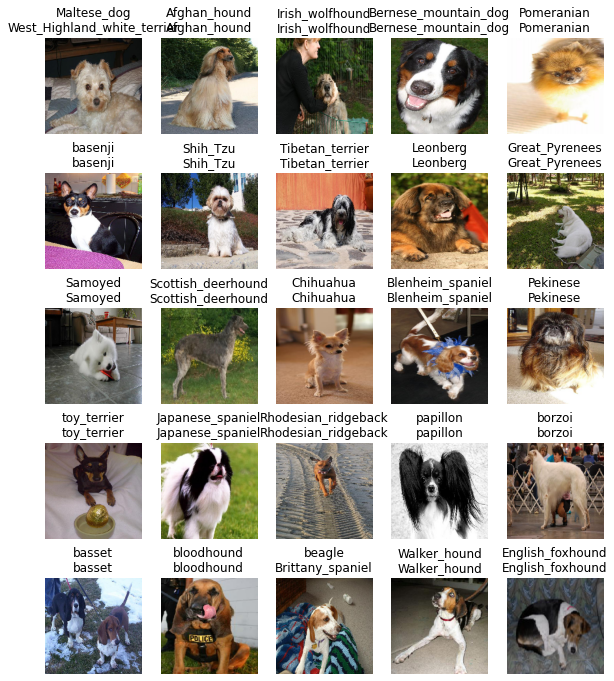

In [ ]:
plt.figure(figsize=(10,12))
i = 1
for sub_dir in os.listdir(dataset_dir):
    sub_dir_images = os.listdir(dataset_dir + sub_dir)
    j = 0
    for sub_dir_image in sub_dir_images:
        if i <= 25 and j == 0:
            img_path = os.path.join(dataset_dir, sub_dir, sub_dir_image)
            img = image.load_img(img_path, target_size=(224, 224))
            plt.subplot(5, 5, i)
            plt.axis('off')
            race = sub_dir.split('-')[1]
            predicted_races = get_top3(img)
            print(race, '->', predicted_races)
            plt.title(race + "\n" + predicted_races[0].split('-')[1])
            plt.imshow(img)
            i = i + 1
            j = j + 1
plt.show()

